# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - extraction

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
green_taxi_df = pd.read_csv('../dataset/green_tripdata_2018-05.csv')
green_taxi_df_clean = green_taxi_df.copy()

In [52]:
green_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796565 entries, 0 to 796564
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 796565 non-null  object 
 1   lpep pickup datetime   796565 non-null  object 
 2   lpep dropoff datetime  796565 non-null  object 
 3   store and fwd flag     796565 non-null  object 
 4   Rate type              796565 non-null  object 
 5   PU Location            796565 non-null  object 
 6   DO Location            796565 non-null  object 
 7   passenger count        794848 non-null  float64
 8   trip distance          796565 non-null  float64
 9   fare amount            796565 non-null  float64
 10  extra                  371974 non-null  float64
 11  mta tax                796565 non-null  float64
 12  tip amount             796565 non-null  float64
 13  tolls amount           796565 non-null  float64
 14  ehail fee              0 non-null   

# 2- EDA

In [53]:
green_taxi_df_clean["pick up hour"] = pd.to_datetime(green_taxi_df_clean["lpep pickup datetime"]).dt.hour
green_taxi_df_clean["drop off hour"] = pd.to_datetime(green_taxi_df_clean["lpep dropoff datetime"]).dt.hour

In [54]:
green_taxi_df_clean.describe(include='all')


,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,...,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge,pick up hour,drop off hour
count,796565,796565,796565,796565,796565,796565,796565,794848.000000,796565.000000,796565.000000,...,796565.000000,796565.000000,0.0,796565.000000,796565.000000,774722,796565,0.0,796565.000000,796565.000000
unique,2,664605,663849,2,6,241,258,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN
top,VeriFone Inc.,2018-05-24 17:38:41,2018-05-05 00:00:00,N,Standard rate,"Manhattan,East Harlem North","Manhattan,East Harlem North",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Credit card,Street-hail,NaN,NaN,NaN
freq,663976,7,44,795348,782205,49432,26749,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,440815,784350,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.362851,3.223991,13.750071,...,1.026558,0.178508,NaN,0.293844,16.096354,NaN,NaN,NaN,13.732146,13.797346
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.178643,3.719447,12.487651,...,2.087790,1.053496,NaN,0.047310,13.567878,NaN,NaN,NaN,5.969128,6.042135
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,-235.000000,...,-2.000000,-5.760000,NaN,-0.300000,-235.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.070000,6.500000,...,0.000000,0.000000,NaN,0.300000,8.300000,NaN,NaN,NaN,10.000000,10.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.940000,10.000000,...,0.000000,0.000000,NaN,0.300000,11.800000,NaN,NaN,NaN,15.000000,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.880000,16.500000,...,1.700000,0.000000,NaN,0.300000,19.300000,NaN,NaN,NaN,18.000000,19.000000


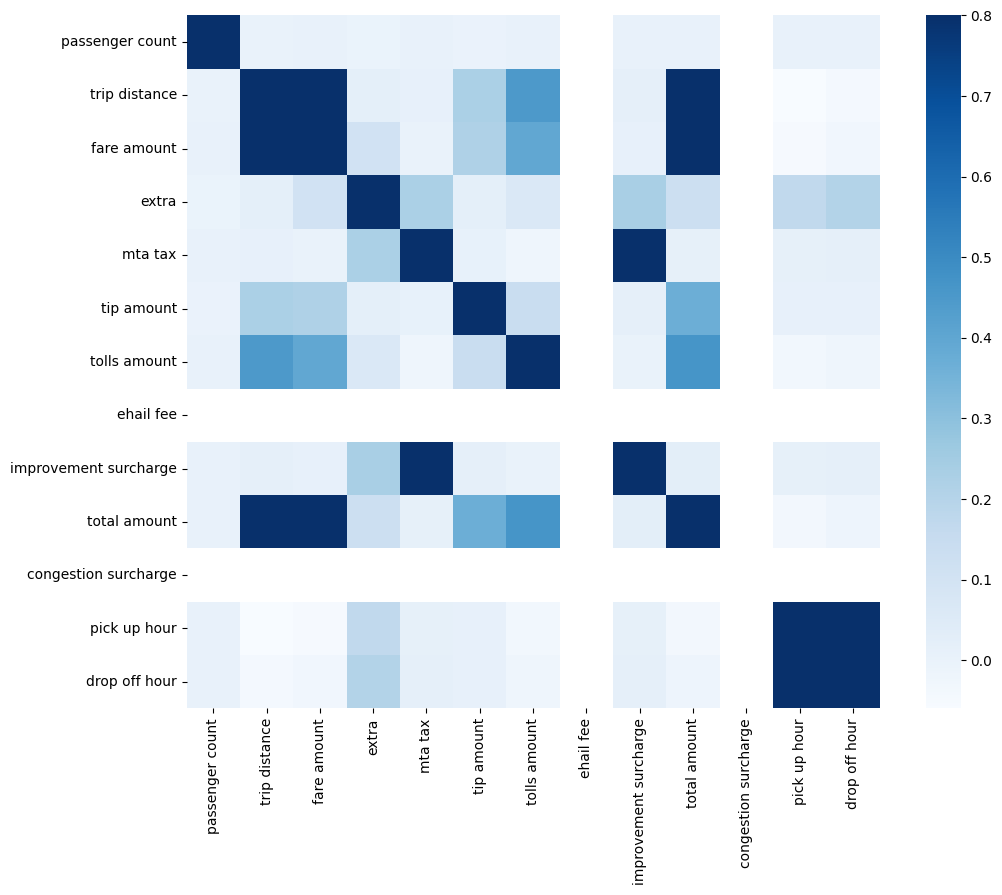

In [55]:
#plot correlation matrix in blue
corrmat = green_taxi_df_clean.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues");
plt.show()


# questions

1- what is the rush hour or peak time for green taxis?(pick up  and drop off hour added earlier)
2-More trips on weekdays or weekends?
3-what's the most expensive city?
4-more trips within the same zone or different zones in city?what about trips between cities?
5-is the rush hour affected by weekend vs weekday?
6- which city uses green taxis the most?

<Axes: xlabel='pick up hour'>

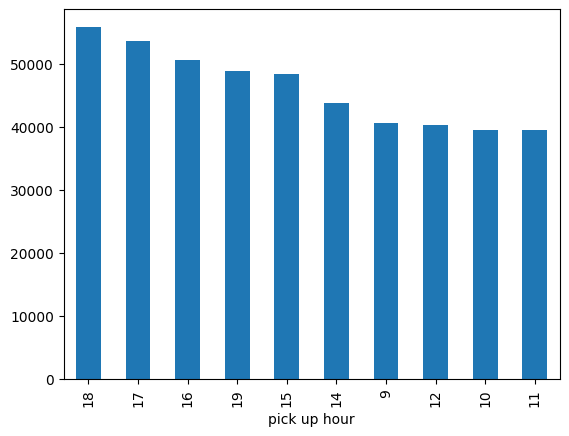

In [56]:
green_taxi_df_clean["pick up hour"].value_counts().head(10).plot.bar()

In [57]:
green_taxi_df_clean["weekday"] = pd.to_datetime(green_taxi_df["lpep pickup datetime"]).dt.weekday

2- which vendor is more expensive?

In [58]:
#which vendor is more expensive
green_taxi_df_clean.groupby("Vendor")["total amount"].mean()

Vendor
Creative Mobile Technologies, LLC    14.904597
VeriFone Inc.                        16.334335
Name: total amount, dtype: float64

In [59]:
green_taxi_df_clean["Rate type"].value_counts()

Rate type
Standard rate            782205
Negotiated fare           11564
JFK                        1748
Nassau or Westchester       619
Newark                      418
Group ride                   11
Name: count, dtype: int64

In [60]:
#separate the PU Location and DO Location to boroughs and zones
green_taxi_df_clean["PU Location Borough"] =green_taxi_df_clean["PU Location"].str.split(',').str[0]
green_taxi_df_clean["PU Location Zone"] =green_taxi_df_clean["PU Location"].str.split(',').str[1]
green_taxi_df_clean["DO Location Borough"] =green_taxi_df_clean["DO Location"].str.split(',').str[0]
green_taxi_df_clean["DO Location Zone"] =green_taxi_df_clean["DO Location"].str.split(',').str[1]





In [61]:
green_taxi_df_clean["PU Location Borough"].value_counts()

PU Location Borough
Manhattan        254926
Brooklyn         253719
Queens           238212
Bronx             48382
Unknown            1184
Staten Island       131
EWR                  11
Name: count, dtype: int64

In [62]:
green_taxi_df_clean["PU Location Zone"].value_counts()

PU Location Zone
East Harlem North               49432
East Harlem South               45133
Central Harlem                  42989
Astoria                         36717
Elmhurst                        34014
                                ...  
Penn Station/Madison Sq West        1
Charleston/Tottenville              1
East Chelsea                        1
Port Richmond                       1
Chinatown                           1
Name: count, Length: 241, dtype: int64

In [63]:
green_taxi_df_clean.groupby("PU Location Borough")["total amount"].mean()

PU Location Borough
Bronx            21.091996
Brooklyn         18.044120
EWR              78.172727
Manhattan        14.090866
Queens           15.133124
Staten Island    45.062901
Unknown          16.384932
Name: total amount, dtype: float64

# 3 - Cleaning Data

## Tidying up column names

In [64]:
def rename_columns(df):
#     make all cols lower case
    df.columns = df.columns.str.lower()

    df.columns = [col.replace(' ', '_') for col in df.columns]
    


In [65]:
rename_columns(green_taxi_df_clean)
green_taxi_df_clean.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pick_up_hour', 'drop_off_hour', 'weekday', 'pu_location_borough',
       'pu_location_zone', 'do_location_borough', 'do_location_zone'],
      dtype='object')

# Observe inconsistent data

### duplicate data

In [66]:
green_taxi_df_clean.duplicated().sum()

7

In [67]:
green_taxi_df_clean.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime','pu_location', 'do_location','trip_distance']).sum()

1997

In [68]:
green_taxi_df_clean.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime','pu_location', 'do_location','trip_distance','fare_amount']).sum()

7

In [69]:
green_taxi_df_clean = green_taxi_df_clean.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime','pu_location', 'do_location','trip_distance'], keep='last')

In [70]:
green_taxi_df_clean.duplicated().sum()

0

### Findings and conclusions

there were 7 duplicate rows in the dataset when checking for duplicates in the entire row.
after using a subset that has the pick and dropoff time and location and distance(to make sure its the exact same trip) we found 1997 trips that were most likely double entries due to some change in one of the features.we investigated further and found that the only difference that was consistent between between the double entries (repeated in all entries) was the fare amount.there were other features that changes across the duplicates like improvement surcharge and other money related features but they're irrelevant as the fare amount covers all 1997 duplicates. we decided to keep the second entry as it's the updated value.
final result is 1997 rows dropped,including identical rows and rows with the same pick up and drop off location and time and distance but different fare amount.


### irrelevant data

In [71]:
green_taxi_df_clean[pd.to_datetime(green_taxi_df_clean['lpep_pickup_datetime']).dt.year != 2018].shape


(15, 27)

In [72]:
#keep only trips that happen in 2018
green_taxi_df_clean['lpep_pickup_datetime'] = pd.to_datetime(green_taxi_df_clean['lpep_pickup_datetime'])
green_taxi_df_clean['lpep_dropoff_datetime'] = pd.to_datetime(green_taxi_df_clean['lpep_dropoff_datetime'])

green_taxi_df_clean = green_taxi_df_clean[(green_taxi_df_clean['lpep_pickup_datetime'].dt.year == 2018) & (green_taxi_df_clean['lpep_dropoff_datetime'].dt.year == 2018)]


In [73]:
green_taxi_df_clean[green_taxi_df_clean['lpep_pickup_datetime'].dt.month != 5].shape

(72, 27)

In [74]:
#keep only trips that happen in may
green_taxi_df_clean = green_taxi_df_clean[(green_taxi_df_clean['lpep_pickup_datetime'].dt.month == 5)]

In [77]:
green_taxi_df_clean[(green_taxi_df_clean.extra == 4.5)].shape

(308, 27)

In [85]:
#what defines a trip? here we remove any "trip" that has no distance, no fare, or no time or negative time
green_taxi_df_clean = green_taxi_df_clean[green_taxi_df_clean.fare_amount > 0]
green_taxi_df_clean =green_taxi_df_clean[green_taxi_df_clean.trip_distance > 0]
green_taxi_df_clean = green_taxi_df_clean[green_taxi_df_clean.lpep_pickup_datetime < green_taxi_df_clean.lpep_dropoff_datetime]


In [95]:
irrelevant = 0
irrelevant+= green_taxi_df_clean[(green_taxi_df_clean.fare_amount <=0)].shape[0]
irrelevant+= green_taxi_df_clean[(green_taxi_df_clean.trip_distance <=0)].shape[0]
irrelevant+= green_taxi_df_clean[(green_taxi_df_clean.lpep_pickup_datetime >= green_taxi_df_clean.lpep_dropoff_datetime)].shape[0]
irrelevant

0

In [98]:
green_taxi_df_clean.

<class 'pandas.core.frame.DataFrame'>
Index: 783927 entries, 0 to 796564
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   vendor                 783927 non-null  object        
 1   lpep_pickup_datetime   783927 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  783927 non-null  datetime64[ns]
 3   store_and_fwd_flag     783927 non-null  object        
 4   rate_type              783927 non-null  object        
 5   pu_location            783927 non-null  object        
 6   do_location            783927 non-null  object        
 7   passenger_count        782286 non-null  float64       
 8   trip_distance          783927 non-null  float64       
 9   fare_amount            783927 non-null  float64       
 10  extra                  368339 non-null  float64       
 11  mta_tax                783927 non-null  float64       
 12  tip_amount             783927 non-null  float64  

### Findings and conclusions

some trips happened out of 2018 and some out of may,2018(we're only interested in may 2018).we dropped those rows.(irrelevant data)

some trips had negative or zero distance or fare amount.we dropped those rows.(irrelevant data or incorrect data respectively)

some trips had negative or 0 time difference between pick up and drop off.we dropped those rows.(irrelevant data or incorrect data respectively)



## Observing Missing Data

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet